In [4]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import StratifiedKFold,cross_val_score

from sklearn.ensemble import BaggingClassifier

In [5]:
Pima_dataset = pd.read_csv("C:\\Users\\harsh\\OneDrive\\Desktop\\Sem2\\Machine Learning\\diabetes.csv.xls")

In [3]:
!pip install xgboost

  Using cached xgboost-2.1.1-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.1-py3-none-win_amd64.whl (124.9 MB)


In [6]:
Pima_dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [7]:
Pima_dataset.shape

(768, 9)

In [8]:
Pima_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
Pima_dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean', missing_values=0)
imputer = imputer.fit(Pima_dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']])
Pima_dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = imputer.transform(Pima_dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']])


In [11]:
print("number of rows with glucose value 0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['Glucose'] == 0])))
print("number of rows with missing BloodPressure 0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['BloodPressure'] == 0])))
print("number of rows with missing skin thikness 0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['SkinThickness'] == 0])))
print("number of rows with Insulin 0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['Insulin'] == 0])))
print("number of rows with BMI 0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['BMI'] == 0])))
print("number of rows with DiabetesPedigreeFunction 0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['DiabetesPedigreeFunction'] == 0])))
print("number of rows with age 0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['Age'] == 0])))


number of rows with glucose value 0 is: 0
number of rows with missing BloodPressure 0 is: 0
number of rows with missing skin thikness 0 is: 0
number of rows with Insulin 0 is: 0
number of rows with BMI 0 is: 0
number of rows with DiabetesPedigreeFunction 0 is: 0
number of rows with age 0 is: 0


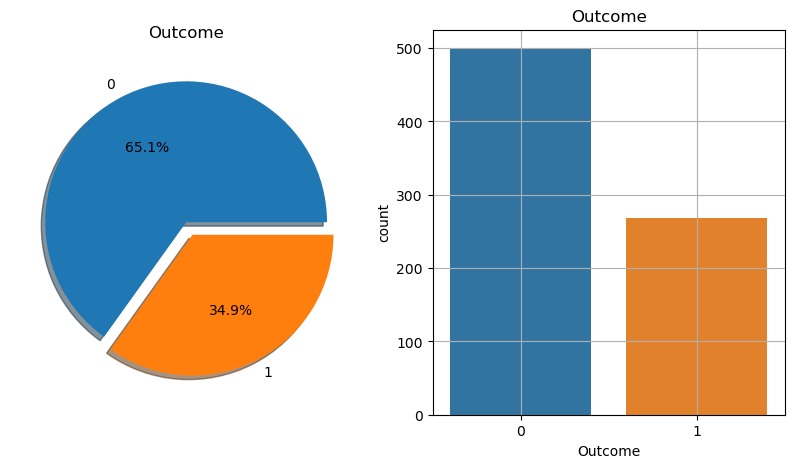

In [12]:
# outcome
f, ax = plt.subplots(1, 2, figsize=(10, 5))

Pima_dataset['Outcome'].value_counts().plot.pie(
    explode=[0, 0.1],
    autopct='%1.1f%%',
    ax=ax[0],
    shadow=True
)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')

sns.countplot(x='Outcome', data=Pima_dataset, ax=ax[1])  # Corrected: x='Outcome'
ax[1].set_title('Outcome')

N, P = Pima_dataset['Outcome'].value_counts()

plt.grid()
plt.show()


In [13]:
Pima_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

# SPLIT THE DATA (TRAIN TEST SPLIT)

In [28]:
X = Pima_dataset.drop(columns='Outcome', axis=1)
Y = Pima_dataset['Outcome']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [30]:
# URL: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html
# Estimate mutual information for a discrete target variable.
# Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. 
# It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X_train, y_train, random_state = 0)
mutual_info


array([0.01555395, 0.11796705, 0.01509219, 0.01035643, 0.02548305,
       0.07923143, 0.        , 0.04601336])

In [31]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

Glucose                     0.117967
BMI                         0.079231
Age                         0.046013
Insulin                     0.025483
Pregnancies                 0.015554
BloodPressure               0.015092
SkinThickness               0.010356
DiabetesPedigreeFunction    0.000000
dtype: float64

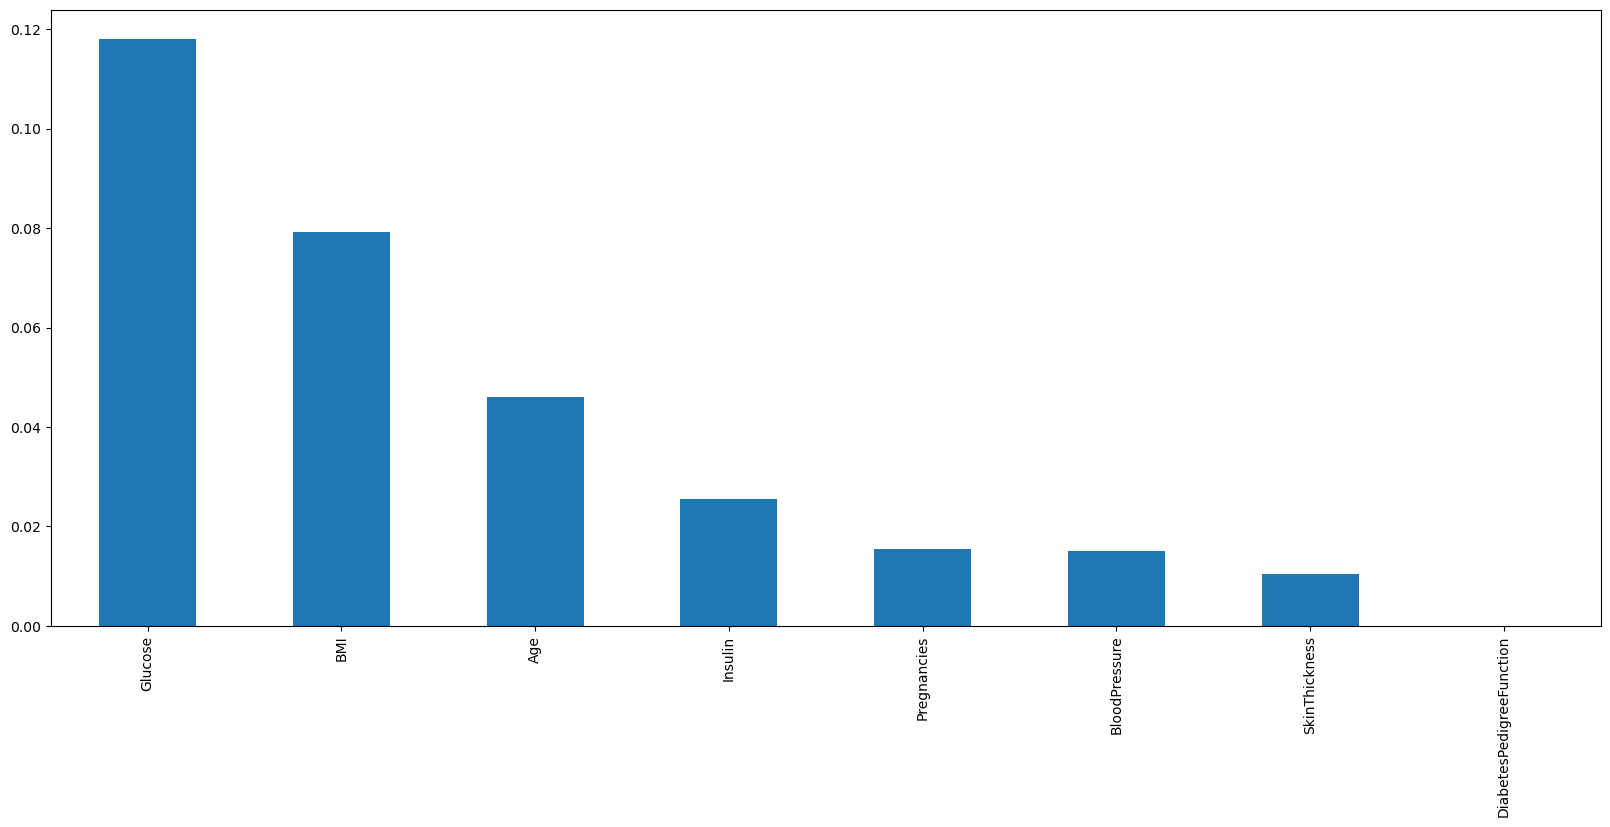

In [32]:
plt.figure(figsize = (20, 8))
mutual_info.sort_values(ascending = False).plot.bar();

In [33]:
#So we decided to drp the DiabetesPedigreeFunction column
Pima_dataset.drop(columns='DiabetesPedigreeFunction',axis=1, inplace=True)

In [34]:
Pima_dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148.0,72.000000,35.00000,155.548223,33.600000,50,1
1,1,85.0,66.000000,29.00000,155.548223,26.600000,31,0
2,8,183.0,64.000000,29.15342,155.548223,23.300000,32,1
3,1,89.0,66.000000,23.00000,94.000000,28.100000,21,0
4,0,137.0,40.000000,35.00000,168.000000,43.100000,33,1
5,5,116.0,74.000000,29.15342,155.548223,25.600000,30,0
6,3,78.0,50.000000,32.00000,88.000000,31.000000,26,1
7,10,115.0,72.405184,29.15342,155.548223,35.300000,29,0
8,2,197.0,70.000000,45.00000,543.000000,30.500000,53,1
9,8,125.0,96.000000,29.15342,155.548223,32.457464,54,1


In [35]:
print(X.shape, X_train.shape,y_train.shape, X_test.shape)

(768, 8) (614, 8) (614,) (154, 8)


# SMOTE IMPLEMENTATION

In [36]:
from imblearn.over_sampling import SMOTE
sm = SMOTE( sampling_strategy='minority',random_state=0)
X_smote, y_smote = sm.fit_resample(X_train, y_train)

np.bincount(y_smote)

array([393, 393], dtype=int64)

In [37]:
# Befor smote
y_train.value_counts()

Outcome
0    393
1    221
Name: count, dtype: int64

In [38]:
# after smote
y_smote.value_counts()

Outcome
1    393
0    393
Name: count, dtype: int64

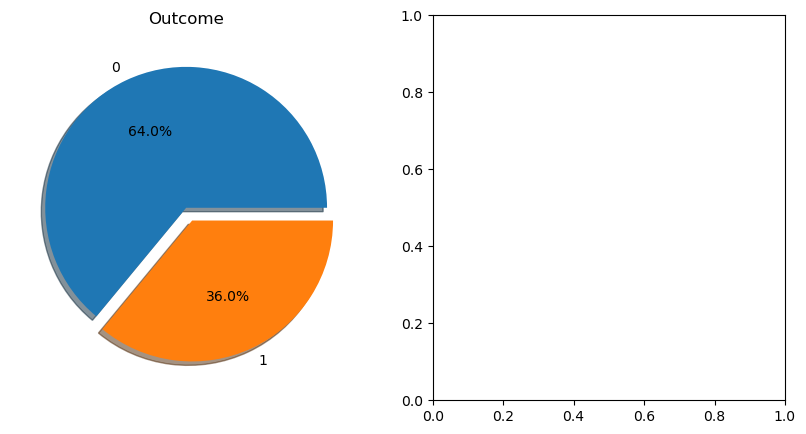

In [39]:
# outcome before smote
f,ax = plt.subplots(1,2, figsize=(10,5))
y_train.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')
plt.show()

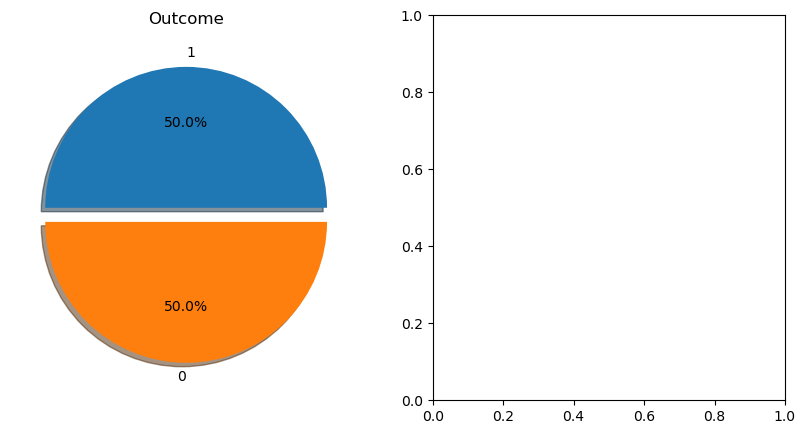

In [40]:
# outcome after smote
f,ax = plt.subplots(1,2, figsize=(10,5))
y_smote.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')
plt.show()

In [41]:
# Befor smote
y_train.value_counts()

Outcome
0    393
1    221
Name: count, dtype: int64

In [42]:
# after smote
y_smote.value_counts()

Outcome
1    393
0    393
Name: count, dtype: int64

# BAGGING DECISION TREE

In [43]:
bagging = BaggingClassifier(DecisionTreeClassifier(random_state=42),n_estimators=500,
                           max_samples=100,bootstrap=True,n_jobs=-1,random_state=42,
                           oob_score=True)
bagging.fit(X_smote,y_smote)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=True,
                  random_state=42)

In [44]:
y_pred=bagging.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

[[88 19]
 [ 8 39]]
Accuracy Score 0.8246753246753247
              precision    recall  f1-score   support

           0       0.92      0.82      0.87       107
           1       0.67      0.83      0.74        47

    accuracy                           0.82       154
   macro avg       0.79      0.83      0.80       154
weighted avg       0.84      0.82      0.83       154



K-FOLD CROSS VALIDATION

In [45]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(bagging,X,Y,cv=skfold)

In [46]:
cv_score

array([0.74025974, 0.71428571, 0.75974026, 0.81699346, 0.75163399])

In [47]:
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7565826330532213 +/- 0.03388036119387347


# DECISION TREE

Depth =  2 , Training Accuracy =  0.7442748091603053 , Test Accuracy =  0.7402597402597403 , Diff =  0.4015068900565022  %
Depth =  3 , Training Accuracy =  0.7620865139949109 , Test Accuracy =  0.6883116883116883 , Diff =  7.377482568322257  %
Depth =  4 , Training Accuracy =  0.7964376590330788 , Test Accuracy =  0.7402597402597403 , Diff =  5.617791877333856  %
Depth =  5 , Training Accuracy =  0.8193384223918575 , Test Accuracy =  0.7207792207792207 , Diff =  9.855920161263676  %
Depth =  6 , Training Accuracy =  0.8409669211195929 , Test Accuracy =  0.7402597402597403 , Diff =  10.070718085985265  %
Depth =  7 , Training Accuracy =  0.8727735368956743 , Test Accuracy =  0.7077922077922078 , Diff =  16.49813291034665  %
Depth =  8 , Training Accuracy =  0.8994910941475827 , Test Accuracy =  0.7142857142857143 , Diff =  18.520537986186834  %
Depth =  9 , Training Accuracy =  0.9223918575063613 , Test Accuracy =  0.7142857142857143 , Diff =  20.8106143220647  %
Depth =  10 , Training

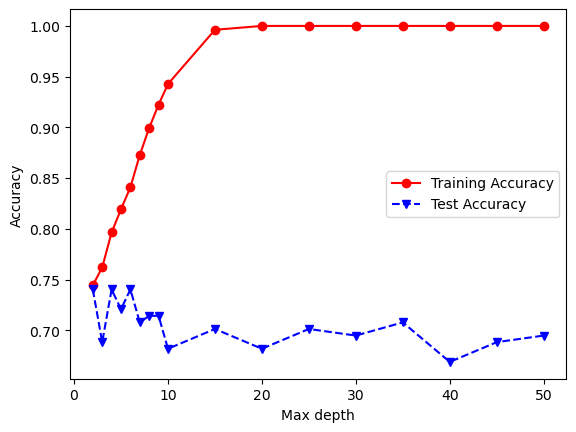

In [48]:
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_smote, y_smote)
    y_predTrain = clf.predict(X_smote)
    y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_smote, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_predTest)
    print("Depth = ", depth, ", Training Accuracy = ", trainAcc[index], ", Test Accuracy = ", testAcc[index], 
          ", Diff = ", np.abs((trainAcc[index]-testAcc[index])*100), " %")
    index += 1

    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy');

In [49]:
# create a model 
dt = DecisionTreeClassifier(max_depth = 2, random_state=0)
dt.fit(X_smote, y_smote)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [50]:
# Accuracy on Train
print("Training Accuracy is: ", dt.score(X_smote, y_smote))

# Accuracy on Test
print("Testing Accuracy is: ", dt.score(X_test, y_test))
X_test_prediction  = dt.predict(X_test) 

print(classification_report(y_test, X_test_prediction))

Training Accuracy is:  0.7442748091603053
Testing Accuracy is:  0.7402597402597403
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       107
           1       0.57      0.57      0.57        47

    accuracy                           0.74       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.74      0.74      0.74       154



In [51]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(dt,X,Y,cv=skfold)


In [52]:
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7357015533486122 +/- 0.012208077742788486


# LOGISTIC REGRESSION

In [53]:
lr = LogisticRegression()
from sklearn.model_selection import GridSearchCV

grid_params = { 
    'max_iter' : [10000],
    'warm_start' : [False, True],  # Corrected: without quotes
    'penalty' : ['l1', 'l2', 'elasticnet', 'none']
}

lr_grid = GridSearchCV(
    LogisticRegression(),
    grid_params,
    verbose=1,
    scoring='accuracy',
    cv=3,
    n_jobs=-1
)

lr_grid.fit(X_smote, y_smote)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
12 fits failed out of a total of 24.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\linear_model\_log

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [10000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'warm_start': [False, True]},
             scoring='accuracy', verbose=1)

In [54]:
lr_bestgrid=lr_grid.best_estimator_

In [55]:
y_pred=lr_bestgrid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

[[82 25]
 [14 33]]
Accuracy Score 0.7467532467532467
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       107
           1       0.57      0.70      0.63        47

    accuracy                           0.75       154
   macro avg       0.71      0.73      0.72       154
weighted avg       0.77      0.75      0.75       154



In [56]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(lr_bestgrid,X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7708598590951532 +/- 0.01627984526015177


# GAUSIEN NAIVE BAYS

In [57]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(GaussianNB(), 
                 param_grid=params_NB, 
                 cv=3,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_smote, y_smote)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


GridSearchCV(cv=3, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [58]:
gs_NB.best_params_

{'var_smoothing': 0.0023101297000831605}

In [59]:
gs_NB=gs_NB.best_estimator_

In [60]:
y_pred=gs_NB.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

[[87 20]
 [16 31]]
Accuracy Score 0.7662337662337663
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       107
           1       0.61      0.66      0.63        47

    accuracy                           0.77       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.77      0.77      0.77       154



In [61]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(GaussianNB(),X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7513453866395042 +/- 0.02026141123825363


# RANDOM FOREST 

In [62]:
###The hyperparameter we got from grid search
rf=RandomForestClassifier(max_depth=780, max_features='log2', n_estimators=600)
### fit the randomized model
rf.fit(X_smote, y_smote)


RandomForestClassifier(max_depth=780, max_features='log2', n_estimators=600)

In [63]:
from sklearn.metrics import accuracy_score
y_pred=rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test, y_pred))

[[89 18]
 [ 9 38]]
Accuracy Score 0.8246753246753247
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       107
           1       0.68      0.81      0.74        47

    accuracy                           0.82       154
   macro avg       0.79      0.82      0.80       154
weighted avg       0.84      0.82      0.83       154



In [64]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(rf,X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7617689500042442 +/- 0.033280209757236986


# XG BOOST

In [65]:
###The hyperparameter we got from grid search
from xgboost import XGBClassifier
xgbc = XGBClassifier(colsample_bytree = 0.8,
 gamma= 1,
 max_depth= 3,
 min_child_weight= 1,
 subsample= 0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(X_smote, y_smote)

In [66]:
from sklearn.metrics import accuracy_score
y_pred=xgbc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test, y_pred))

[[85 22]
 [10 37]]
Accuracy Score 0.7922077922077922
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       107
           1       0.63      0.79      0.70        47

    accuracy                           0.79       154
   macro avg       0.76      0.79      0.77       154
weighted avg       0.81      0.79      0.80       154



In [67]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(xgbc,X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.753968253968254 +/- 0.03093904893130128


# ADA BOOST

In [68]:
from sklearn.ensemble import AdaBoostClassifier
#lrc = LogisticRegression(max_iter=1100)
abc = AdaBoostClassifier(n_estimators=50,estimator=rf,learning_rate=1).fit(X_smote, y_smote)

print(classification_report(y_test,abc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86       107
           1       0.67      0.81      0.73        47

    accuracy                           0.82       154
   macro avg       0.79      0.82      0.80       154
weighted avg       0.83      0.82      0.82       154



In [69]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(abc,X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7591800356506239 +/- 0.04089192743306103


# KNN 

In [70]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=36)
knn.fit(X_smote, y_smote)

# accuracy score on the test data
knn_prediction = knn.predict(X_test) 
knn_prediction_accuracy = accuracy_score(knn_prediction, y_test) 
print('Accuracy score of Test data: ', knn_prediction_accuracy)
print(classification_report(y_test, knn_prediction)) 

Accuracy score of Test data:  0.7467532467532467
              precision    recall  f1-score   support

           0       0.90      0.71      0.80       107
           1       0.56      0.83      0.67        47

    accuracy                           0.75       154
   macro avg       0.73      0.77      0.73       154
weighted avg       0.80      0.75      0.76       154



In [71]:
k = range(1, 100)
train_acc = []
test_acc = []
for x in k:
    knn_clf = KNeighborsClassifier(n_neighbors = x) # Euclidean Distance Metric
    knn_clf.fit(X_smote, y_smote)
    y_pred = knn_clf.predict(X_test)
    train_acc.append(accuracy_score(y_smote, knn_clf.predict(X_smote)))
    test_acc.append(accuracy_score(y_test, y_pred))

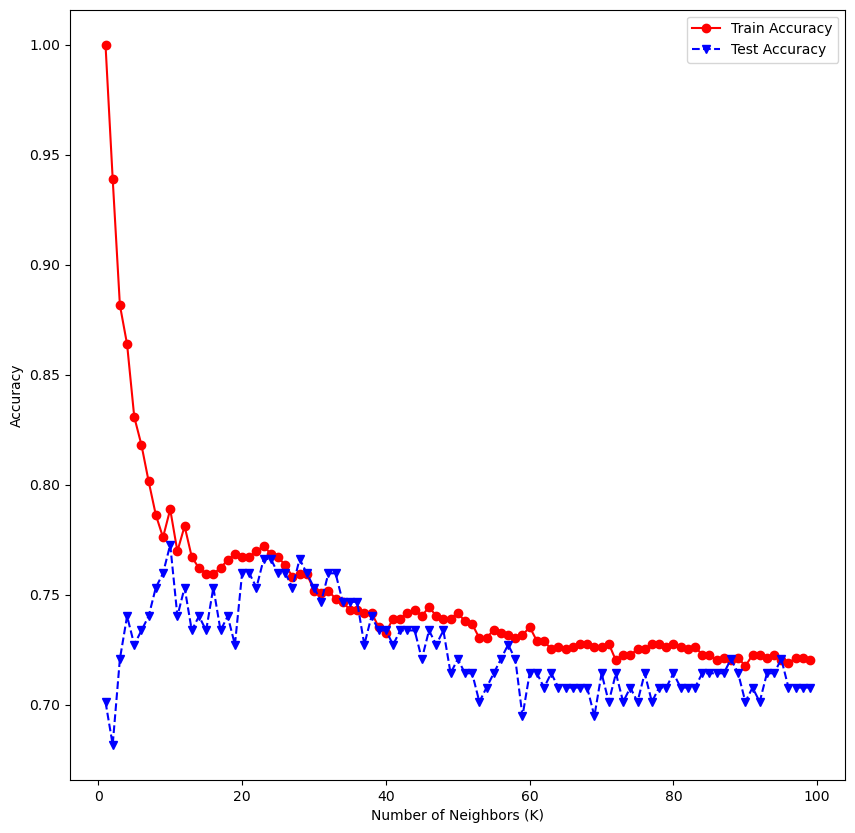

In [72]:
plt.figure(figsize = (10,10))
plt.plot(k,train_acc,'ro-',k,test_acc,'bv--')
plt.legend(['Train Accuracy','Test Accuracy'])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy');

In [73]:
for x in k:
    print('Number of neighbors = ', x, "Train accuracy = ", train_acc[x-1], "Test Accuracy = ", test_acc[x-1], "Difference = ",
         (abs(train_acc[x-1] - test_acc[x-1])*100), "%")

Number of neighbors =  1 Train accuracy =  1.0 Test Accuracy =  0.7012987012987013 Difference =  29.87012987012987 %
Number of neighbors =  2 Train accuracy =  0.9389312977099237 Test Accuracy =  0.6818181818181818 Difference =  25.71131158917419 %
Number of neighbors =  3 Train accuracy =  0.8816793893129771 Test Accuracy =  0.7207792207792207 Difference =  16.090016853375634 %
Number of neighbors =  4 Train accuracy =  0.8638676844783715 Test Accuracy =  0.7402597402597403 Difference =  12.360794421863119 %
Number of neighbors =  5 Train accuracy =  0.8307888040712468 Test Accuracy =  0.7272727272727273 Difference =  10.351607679851949 %
Number of neighbors =  6 Train accuracy =  0.8180661577608143 Test Accuracy =  0.7337662337662337 Difference =  8.429992399458053 %
Number of neighbors =  7 Train accuracy =  0.8015267175572519 Test Accuracy =  0.7402597402597403 Difference =  6.126697729751163 %
Number of neighbors =  8 Train accuracy =  0.7862595419847328 Test Accuracy =  0.7532467

In [74]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV

grid_params = { 'n_neighbors' : [36],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

knn_grid = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose  = 1,
    cv = 10,
    return_train_score=False,
    scoring= 'accuracy',
    n_jobs = -1
    )
    
knn_grid.fit(X_smote, y_smote)
    

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [36],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [75]:
knn_grid.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=36, weights='distance')

In [76]:
knn_bestgrid=knn_grid.best_estimator_

In [77]:
knn_bestgrid

KNeighborsClassifier(metric='manhattan', n_neighbors=36, weights='distance')

In [78]:
y_pred=knn_bestgrid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

[[77 30]
 [ 9 38]]
Accuracy Score 0.7467532467532467
              precision    recall  f1-score   support

           0       0.90      0.72      0.80       107
           1       0.56      0.81      0.66        47

    accuracy                           0.75       154
   macro avg       0.73      0.76      0.73       154
weighted avg       0.79      0.75      0.76       154



In [79]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(knn_bestgrid,X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7526865291571173 +/- 0.03207268507717209
